# DSCI310_Group8 Project Milestone1


## Title: User Knowledge Modeling Data Set: Using Regression to Predict Student Exam Performance by Study Time 


##### Authors: Anam Hira(67844266),Isabela Lucas Bruxellas(33569286),Tony Liang(39356993),Xue Wang(50938547)


##### Reused 2021-2022 Winter Term1 DSCI100 Project and Authorized by Renee Li and Selina Wang

## Summary
In this project, we will explore and predict students'exam performance about Electrical DC Machines based on their study time by using linear regression (LN) and the K-nearest neighbors (K-NN) algorithm. This result could help students gain insight into the necessary study time for specific scores as well as help instructors better understand the performance of students.

As a result of our analysis, we have found the Root mean square prediction error(RMSPE) for our LN model to be 0.281, while the RMSPE of the K-NN model is 0.257. Both types of regression have a prediction error percentage of about 40% (therefore our accuracy is about 60%), although the K-NN model is slightly better than LN model here.

This can be attributed to the fact that exam performance could be affected by other external factors such as health condition, student IQ, stress levels, learning ability and our data set may not be big enough to directly draw a relationship between just study time and exam performance.

The dataset we used was the User Knowledge Modeling Dataset provided by UCL Machine Learning Repository.

## 1. Introduction:

In this study, we will be exploring and predicting students’ exam performance about Electrical DC Machines based on their study time. The question we will try to answer with our project is: What will a student’s exam performance be based on their study time? In our project, we will be using the User Knowledge Modeling Data Set, which has a total of 5 variables observed about students, in addition to the classified knowledge level of user (UNS): 

* STG: the degree of study time for goal object materials
* SCG: the degree of repetition number of user for goal object materials 
* STR: the degree of study time of user for related objects with goal object
* LPR: the exam performance of user for related objects with goal object
* PEG: the exam performance of user for goal objects

These variables were drawn from students’ learning-related activities on the web. The data was also already tidy and pre-divided into training and testing subsets.


Our project question is highly related to student life, especially with finals season coming quickly. Hence, we were inspired to choose study time as one of our predictors so we can analyze the relationship between our study time and exam performance in order to design an effective study plan.

We believe there to be a positive relationship between PEG and STG, since it is natural to assume that increasing the degree of study time would result in higher/better exam performance. As STG increases, so should PEG. The accuracy of our model we are expecting to obtain is 80% because exam performance should be strongly related to study time based on common knowledge.

Thus, we are going to pick STG as the predictor (explanatory variable) and PEG as our response variable. We will be conducting regression since our response variable is numerical. Since we are not sure which regression method (linear or K-NN) will be better at fitting our data set, we will conduct both and compare/contrast their prediction errors to determine the better model.

#### 1.1 Loading the libraries that we need for the data analysis
The libraries we need for reading and analyzing the dataset:

In [79]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(readxl)
library(cowplot)
library(GGally)
library(broom)
library(rlang)
library(testthat)
options(repr.matrix.max.rows = 6)
source("../src/r/load_data.r")
source("../src/r/wrangle_data.r")
source("../src/r/summary_fun.r")
source("../src/r/num_na.r")


#### 1.2 Setting the Seed

In order for our work to be reproducible and make a constant in the randomness, we will set the seed before we do any form of analysis.

In [80]:
set.seed(123)

#### 1.3 Reading the Data

Reading the dataset from the online data folder.

In the original dataset, sheet 2 was already labelled as training data, and sheet 3 was labelled as testing data.

We can see from table 1.3.1 and table 1.3.2 (below) that our data has 403 total observations. Our training dataset has 258 observations and the testing dataset has 145 observations.

From this we've calculated that the proportion of the training data is around 64%, while the testing data is around 36%.

After examining the proportions of data in each sheet, we came to the conclusion that they were in fact labelled correctly due to the higher proportion of data in the sheet 2 and a lower proportion of data in sheet 3. Therefore, we didn't need to split the data ourselves.

data_1 is the training data selected from sheet 2.

In [81]:
dest <- "../data/raw/student_performance.xls"
data_1 <- load_data(dest, 2, STG, SCG, STR, LPR, PEG, UNS)
data_1


New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
...,...,...,...,...,...
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


Table 1.3.1 The training data set of the user knowledge.

data_2 is the testing data selected from sheet 3.

In [82]:
data_2 <- load_data(dest, 3, STG, SCG, STR, LPR, PEG, UNS)
data_2 

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
...,...,...,...,...,...
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


Table 1.3.2 The testing data set of the user knowledge.

* STG: the degree of study time for goal object materials
* SCG: the degree of repetition number of user for goal object materials 
* STR: the degree of study time of user for related objects with goal object
* LPR: the exam performance of user for related objects with goal object
* PEG: the exam performance of user for goal objects
* UNS: the knowledge level of user

We can see from the above tables that the data is already tidy, since each row is a single observation, each column is a single variable, and each value is a single cell. We do not need to do any further tidying. 

#### 1.4 Determing the Predictor(s) and the Response Variable(s).
Comparing distributions of each predictor variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



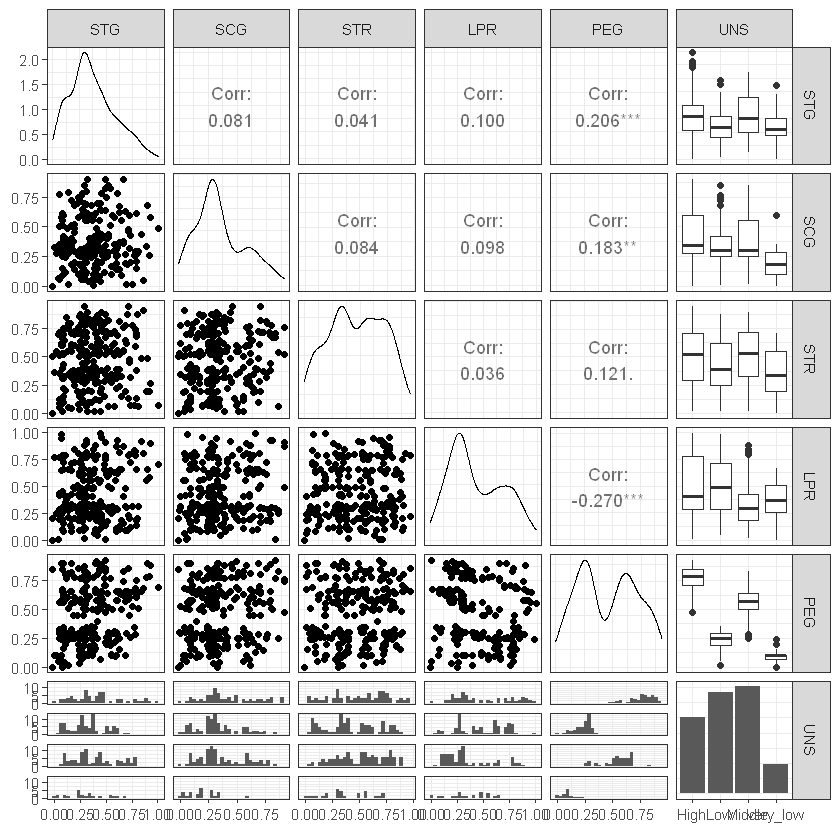

In [83]:
predictors <- ggpairs(data_1) + theme_bw()
predictors

       Figure1.4.1 ggpairs plot among the six variables

To choose the variables we wish to use as predictors, we compared the four variables to PEG (exam performance) using a ggpairs visualization.

It can be observed from the ggpairs visualization that there may be a relationship between STG and PEG.

In regards to why we are only choosing one predictor, it would be extremely difficult (within the scope of this course) to plot the final results, since all of our variables/columns (except UNS) are numerical, and PEG (which is what we are trying to predict) is also numerical. 


Therefore, the one predictor we have chosen to use in our regression is STG. 

#### 1.5 Cleaning and Wrangling the Data
Wrangling the data and removing irrelevant columns. 

Keeping just STG and PEG from the training set, since they are the only variables that we are interested in and will be using.

In [84]:
#user_training <- data_1 %>%
#select(STG,PEG) 
user_training <- wrangle_data(data_1)
user_training

STG,PEG
<dbl>,<dbl>
0.00,0.00
0.08,0.90
0.06,0.33
...,...
0.54,0.77
0.50,0.26
0.66,0.74


Table 1.5.1 The training dataset of the STG and PEG

Keeping just STG and PEG in the testing set.

In [85]:
#user_testing <-data_2 %>%
#select(STG,PEG)
user_testing <- wrangle_data(data_2)
user_testing

STG,PEG
<dbl>,<dbl>
0.00,0.05
0.05,0.14
0.08,0.85
...,...
0.56,0.32
0.66,0.57
0.68,0.24


Table 1.5.2 The testing dataset of the STG and PEG

#### 1.7 Summarizing the Data
The following code is used to find the means of the predictor and explanatory variables (STG and PEG) we plan to use in our analysis.

In [86]:
#user_means <- user_training %>%
#map_df(mean, na.rm =TRUE)
user_means <- summary_fun(user_training,mean)
user_means

STG,PEG
<dbl>,<dbl>
0.3711473,0.4585388


Table 1.7.1 The means of STG and PEG

The following code is used to find the maximums of the predictor and explanatory variables (STG and PEG) we plan to use in our analysis.

In [87]:
#maximum <- user_training %>%
#map_df(max,na.rm =TRUE)

maximum <- summary_fun(user_training, max)
maximum

STG,PEG
<dbl>,<dbl>
0.99,0.93


Table 1.7.2 The maximums of STG and PEG

The following code is used to find the minimums of the predictor and explanatory variables (STG and PEG) we plan to use in analysis.

In [88]:
#minimum <- user_training %>%
#map_df(min,na.rm =TRUE)

minimum <- summary_fun(user_training, min)
minimum

STG,PEG
<dbl>,<dbl>
0,0


Table 1.7.3 The minimums of STG and PEG

From table 1.7.1 to 1.7.3, we can see that the means are 0.37 for STG and 0.46 for PEG, the maximums are 0.99 for STG and 0.93 for PEG, and minimums are 0 for STG and 0 for PEG. 

All of these three summaries show that the values of STG and PEG are close in value and have roughly the same scale. We will not need to scale or standardize the data for linear regression, but it is still good practice to scale the data for K-NN regression, since it is extremely sensitive to differing scales of the variables.

The following code is used to find the number of observations we have of the predictor and explanatory variables we plan to use in analysis.

In [89]:
observations <- user_training %>%
summarize(n = n())
observations

n
<int>
258


Table 1.7.4 The number of observations in the predictor and explanatory variables

The following code is used to find how many rows have missing data

In [94]:
#NA_STG_train<-sum(is.na(user_training$STG))

NA_STG_train <- num_na(user_training, STG)
NA_STG_train

NA_PEG_train <- num_na(user_training, PEG)
NA_PEG_train

NA_STG_test <- num_na(user_testing, STG)
NA_STG_test

NA_PEG_test <- num_na(user_testing, PEG)
NA_PEG_test

[1] 0

[1] 0

[1] 0

[1] 0

Table 1.7.5 The number of rows that have missing data in the predictor and explanatory variables

As indicated above in Table 1.7.5, there is no missing data in both the STG and PEG columns of our training and testing datasets.

#### 1.8 Visualizing the Data

Refer back to the ggpairs plot for additional visualization.

Below we are plotting PEG against STG.


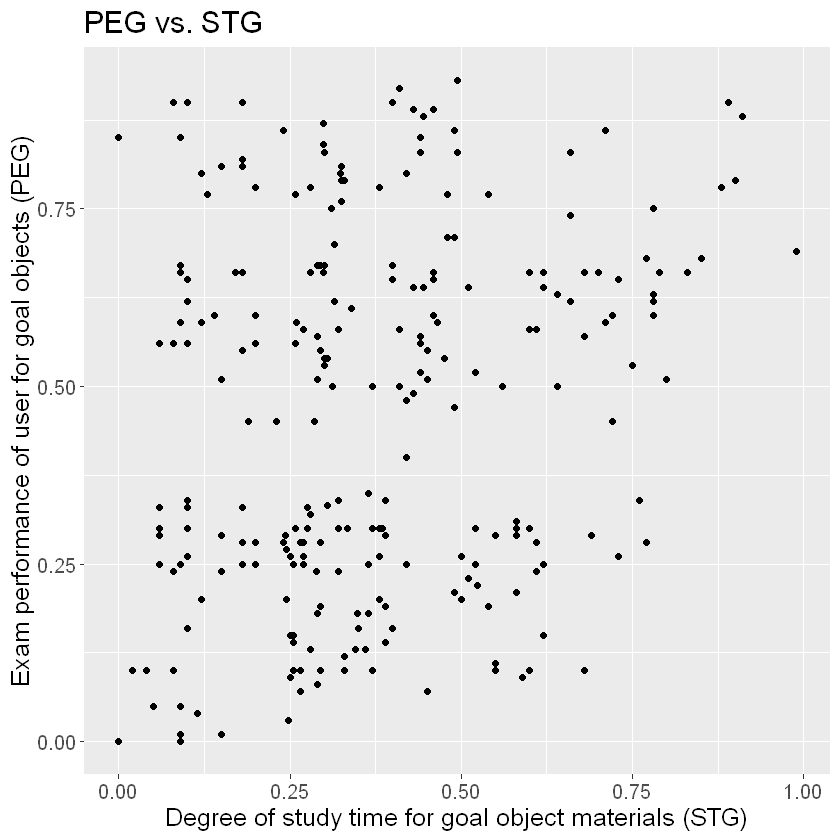

In [95]:
peg_stg <- user_training %>%
    ggplot(aes(x=STG, y=PEG))+ 
    geom_point()+
    labs(y = "Exam performance of user for goal objects (PEG)" , x = "Degree of study time for goal object materials (STG)", title = "PEG vs. STG")+
    theme(text=element_text(size=15))
peg_stg

    Figure1.8.1 The plot of the relationship between PEG and STG

As observed in Figure 1.8.1, there isn’t a clear relationship or pattern between PEG and STG. There is neither a linear/nonlinear nor a positive/negative relationship, as the points are spread out widely on the graph. 

Therefore, no evident relationship can be observed between these two variables. 

### 2. Methods & Results

In order to answer our predictive question, we followed a series of steps to perform our data analysis.

We first loaded our dataset (students’ exam performance about Electrical DC Machines) from the web. The data set was already initially split into training and data sets, so we loaded the respective sheets in. We could observe from the printed tables that the data was already tidy, since each row was a single observation, each column was a single variable, and each value was a single cell. Therefore, we did not need to do any further tidying.  


Next, as part of determining which predictor and explanatory variable to use, we performed a ggpairs visualization to compare the distributions of each predictor variable available in our data set. With some additional reasoning, we chose PEG as our explanatory variable and STG as our predictor variable. We then selected just these two variables in our data set to remove irrelevant columns to our analysis.


We then performed relevant summaries of the data for exploratory data analysis. This included finding the means, maxes and mins, number of observations, and rows of missing data of our variables of interest (PEG and STG). This allowed us to get a better picture of the data we were working with.
Following this, we created a visualization to see the relationship between our chosen variables, with STG on the x-axis and PEG on the y-axis. After plotting PEG against STG, we could not observe a strong relationship between the two, as we saw that the data points were spread out and did not follow a clear or direct relationship. 


To perform the actual data analysis, we used regression to predict a student’s exam performance (PEG) based on their study time (STG). Since we were predicting a numerical value instead of a categorical value, we had to use regression to evaluate and create a prediction. From what we had seen from our exploratory data analysis, K-NN regression seemed to be the better choice as it would allow for more flexibility, but we tested both the accuracies of K-NN and linear regression, and compared them to find the best approach. We trained our regression with our training data and assessed its accuracy with our testing data. To assess the accuracy, we calculated the Root Mean Squared Prediction Error (RMSPE) of our model on the test data to see how well our model generalizes to future data. RMSPE is the square root of the difference between the observed and predicted value of the ith test observation, divided by the number of observations. This indicates how well our model is able to predict on unseen data.


To visualize our final results, we plotted our predictions as a line using geom_smooth overlaid our testing data to see the relationship between the two. The x-axis is STG, and the y-axis is PEG.


#### 2.1 Standardizing the data


As a rule of thumb, standardizing our training data should be a part of the preprocessing before any predictive modelling or analysis, although as mentioned and observed in Figure 1.8.1, the range of the x-axis and y-axis on the scatterplot have roughly the same scale. From the summaries of Figures 1.7.1 to 1.7.3, we can also see that both the predictor and the response variables are close in value and share a similar scale.

There is no need to scale or standardize the data for linear regression, but it is still good practice to scale the data for K-NN regression, since it is extremely sensitive to differing scales of the variables. 

#### 2.2 Linear Regression

Creating and assigning our linear regression model specification to an object called lm_spec.


In [96]:
lm_spec <- linear_reg() %>%
        set_engine("lm") %>%
        set_mode("regression")

Creating a recipe for the model and assigning it to credit_recipe.

In [97]:
performance_recipe <- recipe(PEG~.,data=user_training)

Fitting our simple linear regression model by using the model specification and recipe.

In [98]:
performance_fit <- workflow() %>%
add_recipe(performance_recipe) %>%
add_model(lm_spec) %>%
fit(data = user_training)

performance_fit

== Workflow [trained] ==================================================================================================
Preprocessor: Recipe
Model: linear_reg()

-- Preprocessor --------------------------------------------------------------------------------------------------------
0 Recipe Steps

-- Model ---------------------------------------------------------------------------------------------------------------

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          STG  
     0.3656       0.2505  


Table 2.2.1 the model of linear regression between the STG and PEG

Looking at the slopes and coefficients from the table 2.2.1 from each of the predictors, we can create our prediction model:


Linear Regression Model: the degree of student performance = 0.3656 + 0.2505 * the degree of study time

As the degree of study time increases in one unit, the degree of student performance will increase by 0.2505 units.

We haven't declared the units of STG and PEG here since both STG and PEG are expressed in degree in the oriignal dataset.

Calculating the RMSE to assess goodness of fit on performance_fit

In [99]:
lm_rmse <- performance_fit %>%
        predict(user_training) %>%
        bind_cols(user_training) %>%
        metrics(truth = PEG ,estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) 
lm_rmse

.estimate
<dbl>
0.2492334


knn_rmspe <- performance_fit_knn %>%
  predict(user_testing) %>%
  bind_cols(user_testing) %>%
  metrics(truth = PEG, estimate = .pred)%>%
  filter(.metric == 'rmse') %>%
  pull(.estimate) 

knn_rmspeTable 2.2.1 The RMSE (of our training data) of linear regression

Calculating the RMSPE to assess how well the model predicts on the testing data

In [100]:
lm_rmspe <- performance_fit %>%
        predict(user_testing) %>%
        bind_cols(user_testing) %>%
        metrics(truth = PEG ,estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) 
lm_rmspe

.estimate
<dbl>
0.2810959


Table 2.2.2 The RMSPE (of our testing data) of linear regression

The RMSE (of our training data) of linear regression is 0.249.

The RMSPE (of our testing data) of the linear regression is 0.281.

#### 2.3 K-NN Regression

Because we have already set the seed at the beginning of the report, we don't need to set the seed again. The procedure is reproducible.

Scaling and shifting our predictors on the training data

Creating and assigning the K-NN regression model specification to an object called performance_knn_recipe.

In [101]:
performance_knn_recipe <- recipe(PEG ~., data = user_training) %>%
                        step_center(all_predictors()) %>%
                        step_scale(all_predictors())

performance_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                      set_engine("kknn") %>%
                      set_mode("regression")

performance_vfold <- vfold_cv(user_training, v = 5, strata = PEG)

performance_knn_workflow <- workflow() %>%
                        add_recipe(performance_knn_recipe) %>%
                        add_model(performance_knn_spec)

gridvals <- tibble(neighbors = seq(1,20))

performance_knn_results <- performance_knn_workflow %>%
                       tune_grid(resamples = performance_vfold, grid = gridvals) %>%
                       collect_metrics() 


Selecting the value of k resulting in best RMSE

In [102]:
kmin <- performance_knn_results %>%
               filter(.metric == 'rmse') %>%
               filter(mean == min(mean))  %>% 
               pull(neighbors)
kmin

[1] 20

The best value of K (and hence the one we will be using) yielding the lowest error is K = 20.

Retraining the model using K = 20 and predicting on held-out (testing) data

In [103]:

performance_spec_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>%
  set_engine("kknn") %>%
  set_mode("regression")

performance_fit_knn <- workflow() %>%
  add_recipe(performance_knn_recipe) %>%
  add_model(performance_spec_knn) %>%
  fit(data = user_training)

knn_rmse <- performance_fit_knn %>%
  predict(user_training) %>%
  bind_cols(user_training) %>%
  metrics(truth = PEG, estimate = .pred)%>%
  filter(.metric == 'rmse') 

knn_rmse

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.2273411


Table 2.3.1 The RMSE (of training data) of K-NN regression.

In [104]:
knn_rmspe <- performance_fit_knn %>%
  predict(user_testing) %>%
  bind_cols(user_testing) %>%
  metrics(truth = PEG, estimate = .pred)%>%
  filter(.metric == 'rmse') 

knn_rmspe

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.2574795


Table 2.3.2 The RMSPE (of testing data) of K-NN regression.

The RMSE (of training data) of K-NN regression is 0.227.

The RMSPE (of testing data) of K-NN regression is 0.257.

#### 2.4 Visualization of Linear Regression

`geom_smooth()` using formula 'y ~ x'



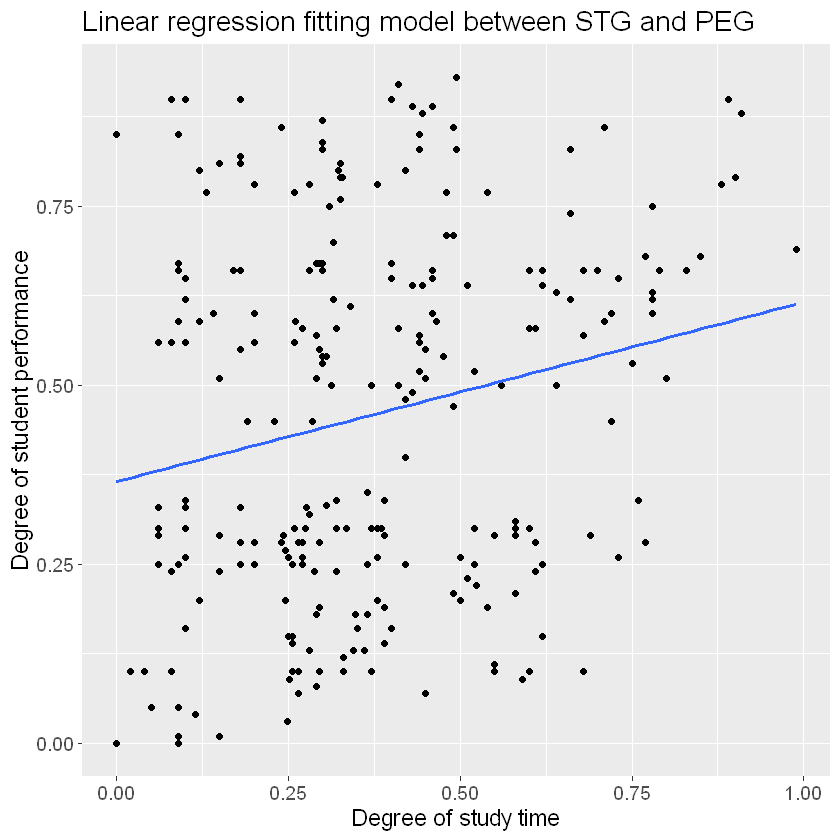

In [105]:
lm_predictions <- user_training %>%
    ggplot(aes(x = STG, y = PEG)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) +
        xlab("Degree of study time") +
        ylab("Degree of student performance") +
        ggtitle("Linear regression fitting model between STG and PEG")+
        theme(text = element_text(size = 14))
lm_predictions

Figure 2.4.1 Linear regression fitted over STG and PEG

Figure 2.4.1 shows our linear regression model overlaid our testing data with STG on the x-axis and PEG on the y-axis. 

We can see that since the data itself is quite spread out, the plotted line of our linear regression cuts through the points, as linear regression usually does. We can see that the points are distributed relatively evenly over and under our fitted line. 

#### 2.5 Visualization of the K-NN Regression

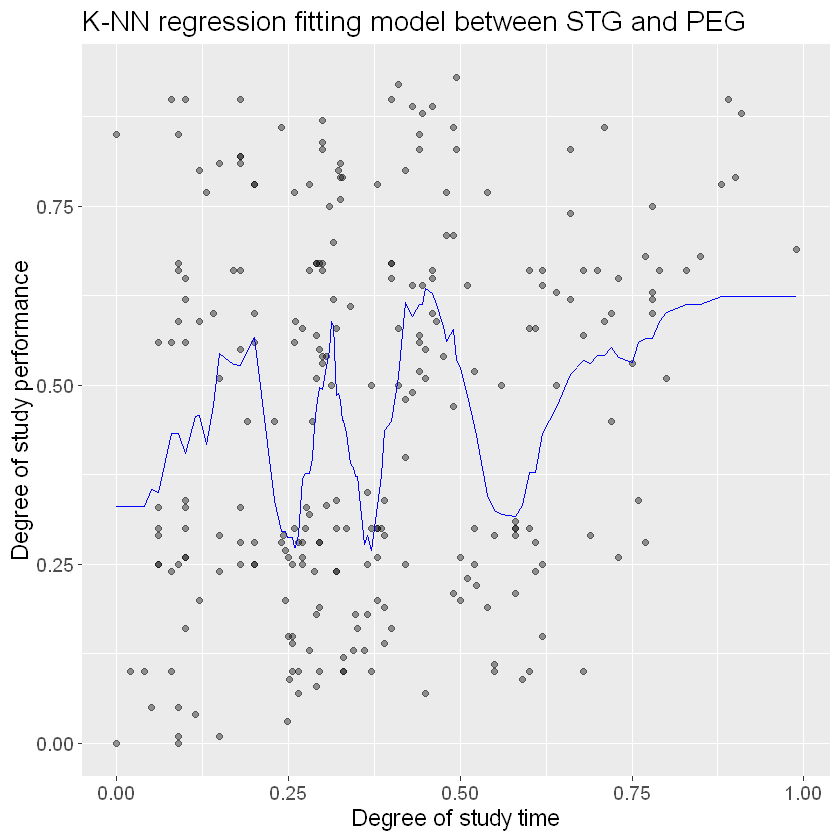

In [106]:
knn_pred <- performance_fit_knn %>%
  predict(user_training) %>%
  bind_cols(user_training)
knn_regression_plot <- ggplot(user_training, aes(x = STG, y = PEG)) +
  geom_point(alpha = 0.4) +
  geom_line(data = knn_pred, 
            mapping = aes(x = STG, y = .pred), 
            color = "blue") +
  xlab("Degree of study time") +
  ylab("Degree of study performance") +
  ggtitle("K-NN regression fitting model between STG and PEG") +
  theme(text = element_text(size = 14))

knn_regression_plot

Figure 2.5.1 the K-NN regression between STG and PEG

Figure 2.5.1 shows our K-NN regression model overlaid our testing data with STG on the x-axis and PEG on the y-axis. 

We can see that although the data itself is quite spread out, the plotted line of our K-NN regression tries to follow the data points by producing “wiggles”. 
This indicates that it is more flexible than our linear model, since it tries to follow most of the points instead of cutting through them.

However, it is unclear if our model underfits or overfits the data since the testing data points themselves are spread out across the entire graph and there is a lot of randomness in our data.

#### 2.6 Comparing and Contrasting End Results

Looking at the visualizations of both methods, we cannot evidently see which model is better. The linear regression model has a relatively even ratio of points above and under the fitted line, but our K-NN Regression is also flexible and follows the data points. Hence, we must rely on the calculated RMSPE to determine the better model.

As seen in Sections 2.2 and 2.3, the the RMSE (of our training data) of linear regression is 0.249, and the RMSPE (of our testing data) of the linear regression is 0.281. The RMSE (of training data) of K-NN regression is 0.227, and the RMSPE (of testing data) of K-NN linear regression is 0.257. By comparing the RMSE of both methods, we can see that our K-NN regression model has a slightly lower RMSE on our training data. By comparing the RMSPE of both methods, we can see that again our K-NN regression model has a slightly lower RMSPE on our testing data. Therefore, our K-NN Regression Model is slightly more accurate.

Due to the higher accuracy of our K-NN Regression, our final visualization of the best model is shown in Figure 2.5.1. 

### 3. Discussion

Before performing the analysis, we had expected to find a positive, linear relationship between PEG and STG. As a student spends more time studying, they should perform better. As a result of our analysis, we have found the accuracy for our linear regression model to be 0.257, while the accuracy of our K-NN regression is 0.227 (where the range of degree is 1). 

Both of these types of regression have a prediction error percentage of about 40% (therefore our accuracy is about 60%), but as discussed in 2.6, our K-NN Regression model is slightly better than our linear regression due to its higher accuracy, which is consistent with our guess in Methods. Our model has relatively low accuracy. 

This was not quite what we had expected to find as the outcome of our analysis, since we initially expected to be able to observe a clearer positive relationship between STG and PEG. However, this can still be reasoned with the fact that there was already not much of a strong relationship between STG and PEG as described in Section 1.8.  

As mentioned in the Introduction, we had initially believed the accuracy of our K-NN regression to be about 80%. Since there are no missing observations in our data set, there may be several reasons causing this difference in estimated accuracy and the actual accuracy calculated. On one hand, this can be attributed to the fact that exam performance could be affected by other external factors such as health condition, student IQ, stress levels, learning ability, etc. that were not in the data set. On the other hand, we can also say that our data set may not be big enough to directly draw a relationship between just study time and exam performance. 

It would be best to seek out another form of prediction that can predict using multiple factors (which would be outside the scope of what we have learned thus far in our course), or find a larger data set with more observations.

In conclusion, our findings will somewhat help students assess how well they are performing in comparison to the time they are spending studying. As you spend more time studying, you may perform better, but other external factors can also come into play and affect your final results. Since it is final season, it is important to remember that although studying is extremely important, it is also crucial to take care of other things such as your physical and mental health. 

This study can also be beneficial to find the best study methods and learn how to study more efficiently. Some future questions to consider:

* How much time should a student be spending studying to improve exam performance?
* How do other factors (such as repetition, knowledge level, etc.) contribute to exam performance?
* Can a similar approach be used in the industry to predict workers' performance based on their working time? How?

### 4. References

Colak, I., Sagiroglu, S., & Kahraman, H. T. (2008, December). A user modeling approach to web based adaptive educational hypermedia systems. In 2008 Seventh International Conference on Machine Learning and Applications (pp. 694-699). IEEE.

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Kahraman, H. T. (2009). Designing and Application of Web-Based Adaptive Intelligent Education System. Gazi University Ph. D. Thesis, Turkey, 1-156.

Tsiriga, V., & Virvou, M. (2004). A framework for the initialization of student models in web-based intelligent tutoring systems. User Modeling and User-Adapted Interaction, 14(4), 289-316.

UCI Machine Learning Repository: User Knowledge Modeling Data Set. (2009, October). Machine Learning Repository. Retrieved Novermber 6, 2021, from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling 